In [8]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [9]:
import json
import os
description_log_file = os.path.join(os.path.dirname(os.getcwd()), "log_dir/scaling_factor_1.0_v3_worker0_maxfile5_no12-20250126T202952Z-001/scaling_factor_1.0_v3_worker0_maxfile5_no12/policy_description.json")
# update the log file
with open(description_log_file, 'r') as f:
    log_data = json.load(f)

In [10]:
description_name = "dynamic_joint_latent"
description_size = len(log_data['Gendog0'][description_name])
df_list = []

for dog_key, data_dict in log_data.items():
    # Extract the 2D list (m×n)
    matrix = data_dict[description_name]
    
    # Convert that matrix into a small DataFrame
    temp_df = pd.DataFrame([matrix])
    
    # # 2. Convert dog_key (e.g. "Gendog266") to an integer (e.g. 266)
    #    by removing the "Gendog" prefix, then converting to int
    numeric_suffix = int(dog_key.replace("Gendog", ""))
    
    # 3. Add columns:
    temp_df["Gendog"] = dog_key    # original key
    temp_df["y"] = numeric_suffix  # numeric-only suffix
    
    # Collect this temporary DataFrame
    df_list.append(temp_df)

# Concatenate all small DataFrames into one
df = pd.concat(df_list, ignore_index=True)


In [11]:
value_column = range(description_size)
df_subset = df[value_column]

In [12]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=300)
tsne_results = tsne.fit_transform(df_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 308 samples in 0.001s...
[t-SNE] Computed neighbors for 308 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 308 / 308
[t-SNE] Mean sigma: 0.392184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.783688
[t-SNE] KL divergence after 300 iterations: 0.235642
t-SNE done! Time elapsed: 0.30532217025756836 seconds


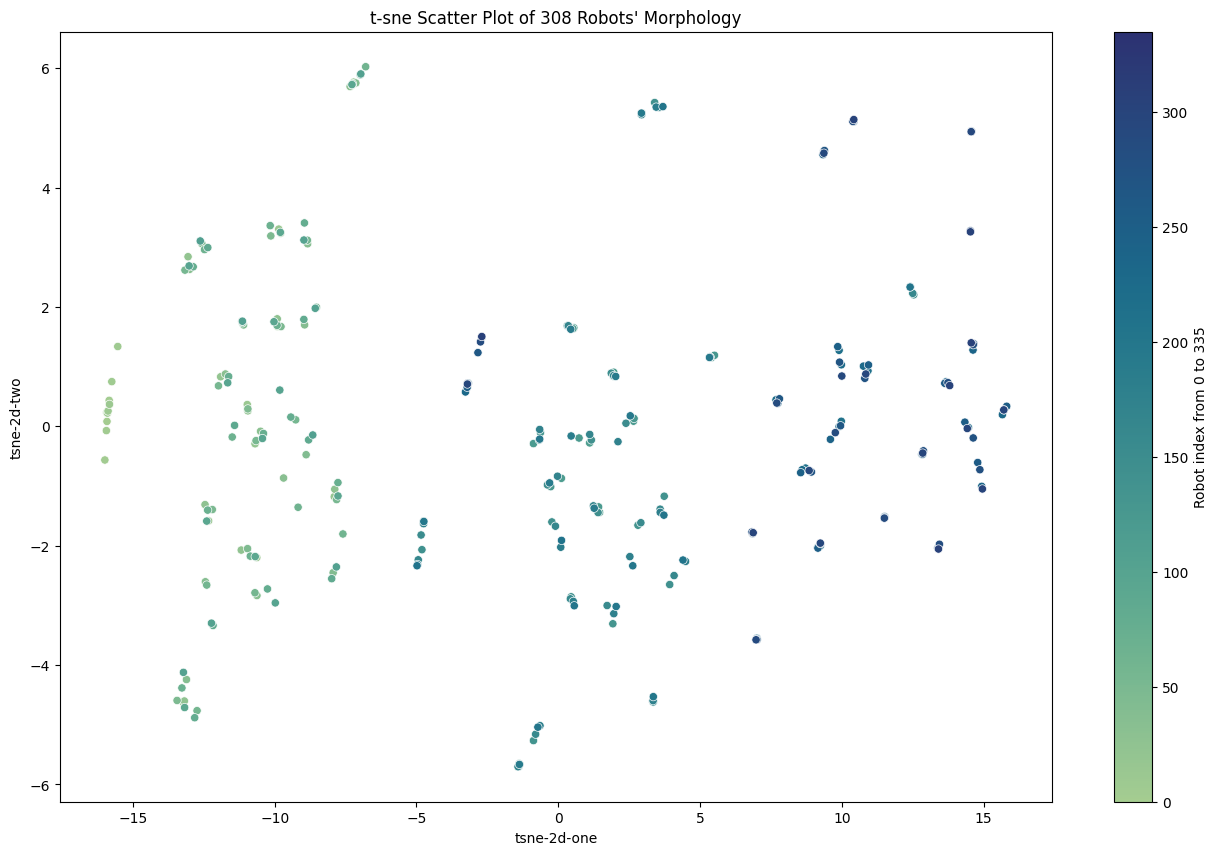

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Make sure y is numeric
df["y"] = df["y"].astype(float)

# Create a discrete palette and convert it to a ListedColormap
discrete_palette = sns.color_palette("crest", 336)
cmap = mcolors.ListedColormap(discrete_palette)
norm = plt.Normalize(vmin=0, vmax=335)

# 1) Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(16,10))

# 2) Plot using the created axes
scatter = sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue="y",
    palette=cmap,
    hue_norm=(0, 335),
    data=df,
    legend=False,   # Turn off the default Seaborn legend
    alpha=1,
    ax=ax           # Specify the axes here
)

# 3) Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Needed for some matplotlib versions

# 4) Add the colorbar, telling it which axes to steal space from
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Robot index from 0 to 335")

plt.title("t-sne Scatter Plot of 308 Robots' Morphology")
plt.show()
